###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

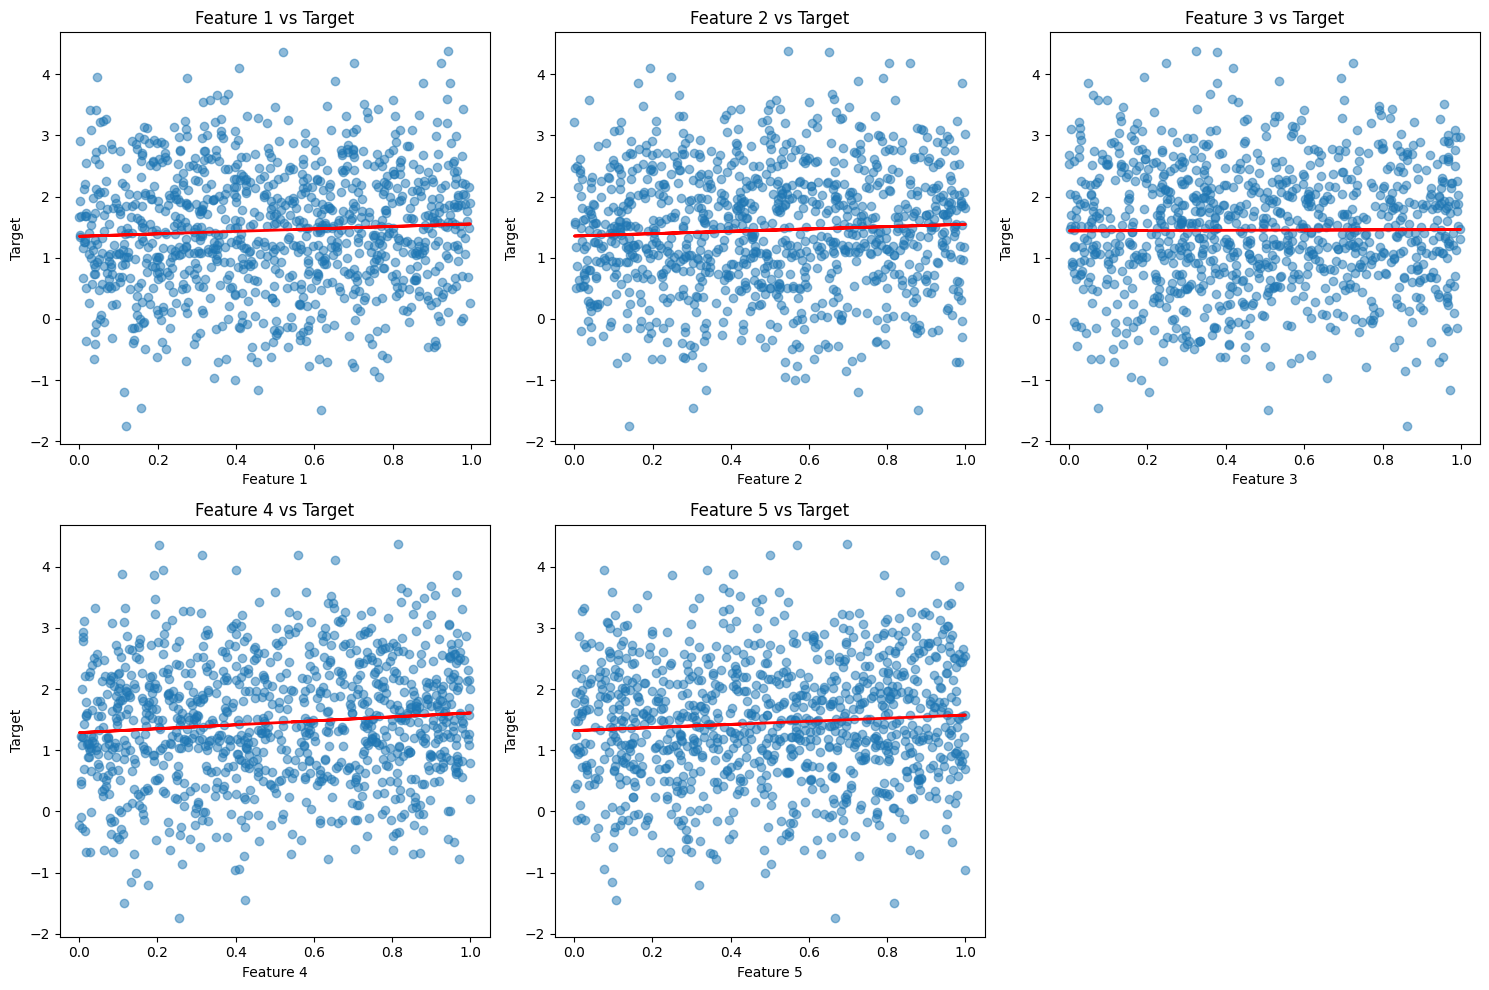

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generating random datapints for features and target
np.random.seed(0) 
n_samples = 1000
n_features = 5
X = np.random.rand(n_samples, n_features)

true_coefficients = np.random.rand(n_features)
true_intercept = np.random.rand()
y = X.dot(true_coefficients) + true_intercept + np.random.randn(n_samples)
plt.figure(figsize=(15, 10))

for i in range(n_features):
    # Fit linear regression model using sklearn
    model = LinearRegression()
    model.fit(X[:, i:i+1], y)
    y_pred = model.predict(X[:, i:i+1])
    
    # Plotting the data points
    plt.subplot(2, 3, i+1)
    plt.scatter(X[:, i], y, alpha=0.5)
    plt.title(f"Feature {i+1} vs Target")
    plt.xlabel(f"Feature {i+1}")
    plt.ylabel("Target")
    
    # Plot the best fit line for ith feature
    plt.plot(X[:, i], y_pred, color='red', linewidth=2)
    
plt.tight_layout()
plt.show()

### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

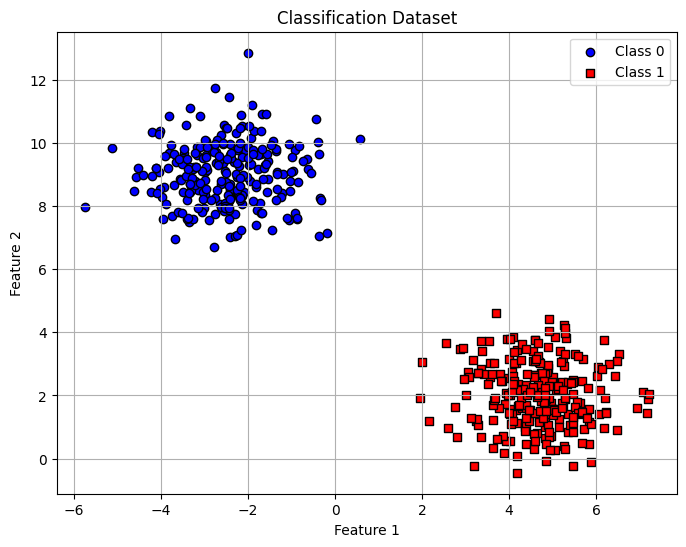

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 1000
n_features = 2
n_classes = 2
n_clusters_per_class = 2
random_state = 42

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_classes*n_clusters_per_class,
                  cluster_std=1.0, random_state=random_state)

# now plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', marker='o', edgecolors='k', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', marker='s', edgecolors='k', label='Class 1')
plt.title('Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

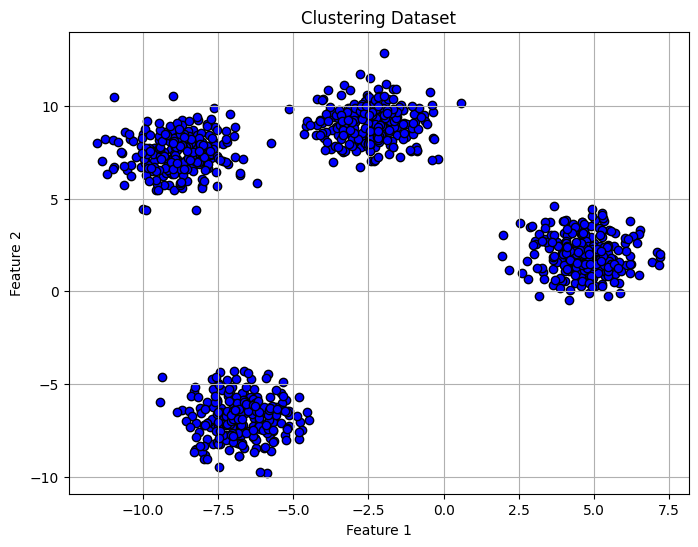

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 1000
n_features = 2
n_clusters = 4
random_state = 42

X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters,
                  cluster_std=1.0, random_state=random_state)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolors='k')
plt.title('Clustering Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.worldometers.info/coronavirus/"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find('table', id='main_table_countries_today')
headers = [header.text.strip() for header in table.find_all('th')]
data = {header: [] for header in headers}
rows = table.find_all('tr')

for row in rows[1:]:
    cols = row.find_all('td')
    for i, col in enumerate(cols):
        data[headers[i]].append(col.text.strip())

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data)

# change columns name
df.rename(columns={
    'Country,Other': 'Country',
    'TotalCases': 'Total Cases',
    'NewCases': 'New Cases',
    'TotalDeaths': 'Total Deaths',
    'NewDeaths': 'New Deaths',
    'TotalRecovered': 'Total Recovered',
    'NewRecovered': 'New Recovered',
    'ActiveCases': 'Active Cases'
}, inplace=True)

print(df)

    #         Country  Total Cases New Cases Total Deaths New Deaths  \
0       North America  131,889,132              1,695,941              
1                Asia  221,500,265              1,553,662              
2              Europe  253,406,198              2,101,824              
3       South America   70,200,879              1,367,332              
4             Oceania   14,895,771                 33,015              
..  ..            ...          ...       ...          ...        ...   
242            Total:   70,200,879              1,367,332              
243            Total:   14,895,771                 33,015              
244            Total:   12,860,924                258,892              
245            Total:          721                     15              
246            Total:  704,753,890         0    7,010,681          0   

    Total Recovered New Recovered Active Cases Serious,Critical  ...  \
0       127,665,129          +350    2,528,062            6,095

# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

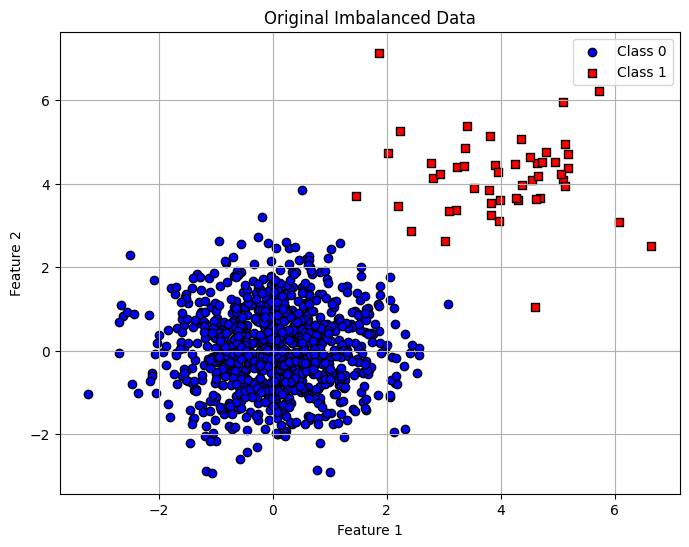

Number of samples after SMOTE:
 [950 950]


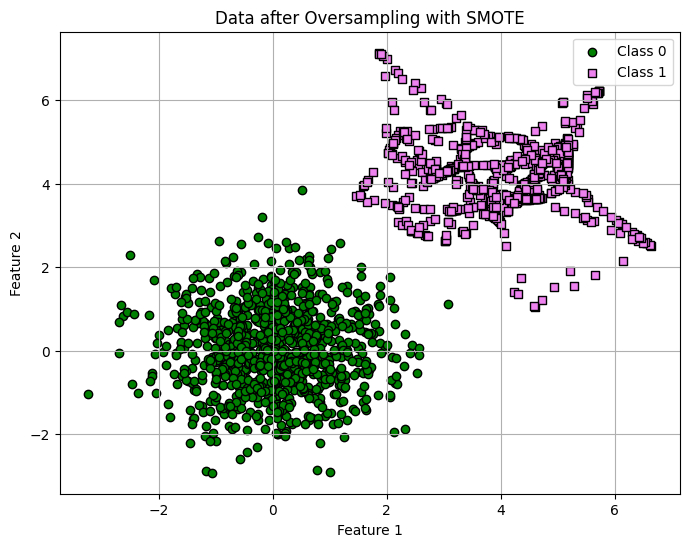

Number of samples after RandomUnderSampler:
 [250  50]


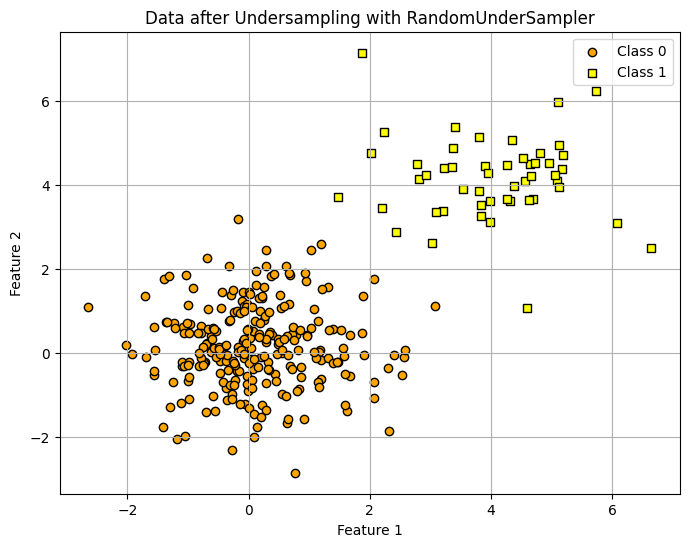

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
np.random.seed(42)

# Number of samples
n_samples = 1000

# features for class 0
X_class0 = np.random.normal(loc=[0, 0], scale=[1, 1], size=(int(n_samples*0.95), 2))

# features for class 1
X_class1 = np.random.normal(loc=[4, 4], scale=[1, 1], size=(int(n_samples*0.05), 2))

X = np.vstack([X_class0, X_class1])
y = np.hstack([np.zeros(X_class0.shape[0]), np.ones(X_class1.shape[0])])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', marker='o', edgecolors='k', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', marker='s', edgecolors='k', label='Class 1')
plt.title('Original Imbalanced Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# oversampling of minority class using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

y_resampled_int = y_resampled.astype(int)


print("Number of samples after SMOTE:\n", np.bincount(y_resampled_int))

# data after oversampling
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], c='green', marker='o', edgecolors='k', label='Class 0')
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], c='violet', marker='s', edgecolors='k', label='Class 1')
plt.title('Data after Oversampling with SMOTE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# undersampling of majority class using RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy=0.2, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

y_resampled_int2 = y_resampled.astype(int)

print("Number of samples after RandomUnderSampler:\n", np.bincount(y_resampled_int2))

#  data after undersampling
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], c='orange', marker='o', edgecolors='k', label='Class 0')
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], c='yellow', marker='s', edgecolors='k', label='Class 1')
plt.title('Data after Undersampling with RandomUnderSampler')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [6]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)

# first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head(5))

# missing values
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# dimensions of the training and testing sets
print("\nDimensions of the training set:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nDimensions of the testing set:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

# Standardize the feature data in the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# same scaling transformation on the testing set
X_test_scaled = scaler.transform(X_test)

# first 5 rows of the standardized training set
print("\nFirst 5 rows of the standardized training set:")
print(pd.DataFrame(X_train_scaled, columns=iris.feature_names).head())

First 5 rows of the DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Missing values in the DataFrame:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Dimensions of the training set:
X_train: (105, 4)
y_train: (105,)

Dimensions of the testing set:
X_test: (45, 4)
y_test: (45,)

First 5 rows of the standardized training set:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.413416         -1.462003          -0.099511         -0.323398
1           0.551222         -0.502563       